# Importing Libraries

In [ ]:
from google.colab import auth, drive
from oauth2client.client import GoogleCredentials
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn import under_sampling, over_sampling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

auth.authenticate_user()
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Data & Preliminary Look

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Finpro BI 6 - Dimas Baswara Pramudita/bank-additional-full.csv', sep= ';')

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Link to the dataset :
<br>https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing

<br>Variables :
<br>Bank client data:
- Age (numeric)
- Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
- Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
- Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
- Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
- Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
- Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

<br>Related with the last contact of the current campaign:
- Contact: contact communication type (categorical:
'cellular','telephone')
- Month: last contact month of year (categorical: 'jan', 'feb', 'mar',
…, 'nov', 'dec')
- Day_of_week: last contact day of the week (categorical:
'mon','tue','wed','thu','fri')
- Duration: last contact duration, in seconds (numeric). Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). Yet, the duration is not known before a call
is performed. Also, after the end of the call y is obviously known.
Thus, this input should only be included for benchmark purposes and
should be discarded if the intention is to have a realistic
predictive model.

<br>Other attributes:
- Campaign: number of contacts performed during this campaign and for
this client (numeric, includes last contact)
- Pdays: number of days that passed by after the client was last
contacted from a previous campaign (numeric; 999 means client was not
previously contacted)
- Previous: number of contacts performed before this campaign and for
this client (numeric)
- Poutcome: outcome of the previous marketing campaign (categorical:
'failure','nonexistent','success')

<br>Social and economic context attributes:
- Emp.var.rate: employment variation rate - quarterly indicator
(numeric)
- Cons.price.idx: consumer price index - monthly indicator (numeric)
- Cons.conf.idx: consumer confidence index - monthly indicator
(numeric)
- Euribor3m: euribor 3 month rate - daily indicator (numeric)
- Nr.employed: number of employees - quarterly indicator (numeric)

<br>Output variable (desired target):
- y - has the client subscribed a term deposit? (binary: 'yes', 'no')

In [ ]:
def print_category_counts(dataframe, column_names):
  for column_name in column_names:
    print(column_name + ':', dataframe[column_name].value_counts(), sep='\n')
    print('-'*40)

#categorical columns
categorical = df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

#print function
print_category_counts(df, categorical)

job:
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
----------------------------------------
marital:
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
----------------------------------------
education:
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
----------------------------------------
default:
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
----------------------------------------
housing:
yes        21576
no         18622
unknown      990
N

There are some "Unknown" values which are actually missing values for us in variables:
1. job
2. marital
3. education
4. default
5. housing
6. loan

So, we will remove unknown value

# Data Cleaning

## Handling Missing Values

There are 'unknown' values which are missing value for us

In [ ]:
df = df.replace('unknown', np.nan)

In [ ]:
#percentage of missing value
df.isnull().sum()/df.shape[0]*100

age                0.000000
job                0.801204
marital            0.194231
education          4.202680
default           20.872584
housing            2.403613
loan               2.403613
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
y                  0.000000
dtype: float64

Due to the relatively small amount of missing values, they will be removed, except for the 'default' feature where the missing values are quite substantial at 20% but default feature is mostly "no" which is highly imbalanced, I also drop this feature.

In [ ]:
df = df.dropna().reset_index(drop=True)

In [ ]:
df['default'].value_counts()

no     30485
yes        3
Name: default, dtype: int64

highly imbalanced, so i will drop this feature

In [ ]:
df.drop('default',inplace=True, axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30488 entries, 0 to 30487
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   housing         30488 non-null  object 
 5   loan            30488 non-null  object 
 6   contact         30488 non-null  object 
 7   month           30488 non-null  object 
 8   day_of_week     30488 non-null  object 
 9   duration        30488 non-null  int64  
 10  campaign        30488 non-null  int64  
 11  pdays           30488 non-null  int64  
 12  previous        30488 non-null  int64  
 13  poutcome        30488 non-null  object 
 14  emp.var.rate    30488 non-null  float64
 15  cons.price.idx  30488 non-null  float64
 16  cons.conf.idx   30488 non-null  float64
 17  euribor3m       30488 non-null 

## Handling Duplicated Value

In [ ]:
df.duplicated().sum()

10

In [ ]:
#Remove duplicate data and reset the index sequentially
df = df.drop_duplicates().reset_index(drop=True)

In [ ]:
#Recheck
df.duplicated().sum()

0

The duplicate data has been resolved.

## Handling Values

Pdays: number of days that passed by after the client was last
contacted from a previous campaign (numeric; 999 means client was not
previously contacted). which means the value should be replaced with 0.



In [ ]:
df.loc[df['pdays'] == 999, 'pdays'] = 0

## Handling Data Type

In [ ]:
# Membuat fungsi untuk mengubah nama bulan menjadi tipe data bulan (month)
def convert_to_month(month):
    month_dict = {'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
                  'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
    return month_dict.get(month)

# Mengonversi kolom 'Month' menjadi tipe data bulan (month)
df['month'] = df['month'].apply(convert_to_month)


In [ ]:
df['month'].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  3,  4,  9])

# Exploratory Data Analysis

## Analytics Descriptive

In [ ]:
numeric = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categoric = df.select_dtypes(include='object').columns.tolist()

In [ ]:
df[numeric].describe()

,age,month,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000
mean,39.029694,6.704836,259.513124,2.521721,0.257136,0.194337,-0.071425,93.523376,-40.602579,3.459976,5160.813967
std,10.332746,2.134736,261.746393,2.720495,1.448324,0.522862,1.610306,0.585366,4.788790,1.777215,75.158267
min,17.000000,3.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,5.000000,103.000000,1.000000,0.000000,0.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000
50%,37.000000,6.000000,181.000000,2.000000,0.000000,0.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000
75%,45.000000,8.000000,321.000000,3.000000,0.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,95.000000,12.000000,4918.000000,43.000000,27.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df[categoric].describe()

,job,marital,education,housing,loan,contact,day_of_week,poutcome,y
count,30478,30478,30478,30478,30478,30478,30478,30478,30478
unique,11,3,7,2,2,2,5,3,2
top,admin.,married,university.degree,yes,no,cellular,thu,nonexistent,no
freq,8734,17487,10408,16516,25710,20435,6391,25826,26620


## Univariate Analysis

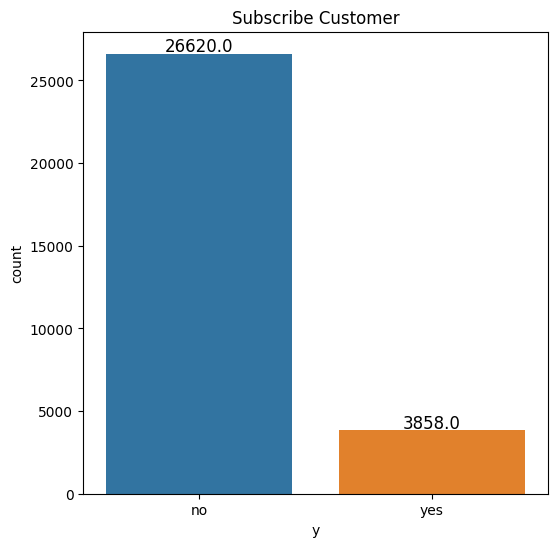

In [ ]:
plt.figure(figsize=(6, 6))
plt.title('Subscribe Customer')
ax = sns.countplot(data=df, x=df['y'])

for p in ax.patches :
  ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
              ha='center', va='center', fontsize=12, color='black', xytext=(0,5),
              textcoords='offset points')

plt.show()

## Bivariate Analysis

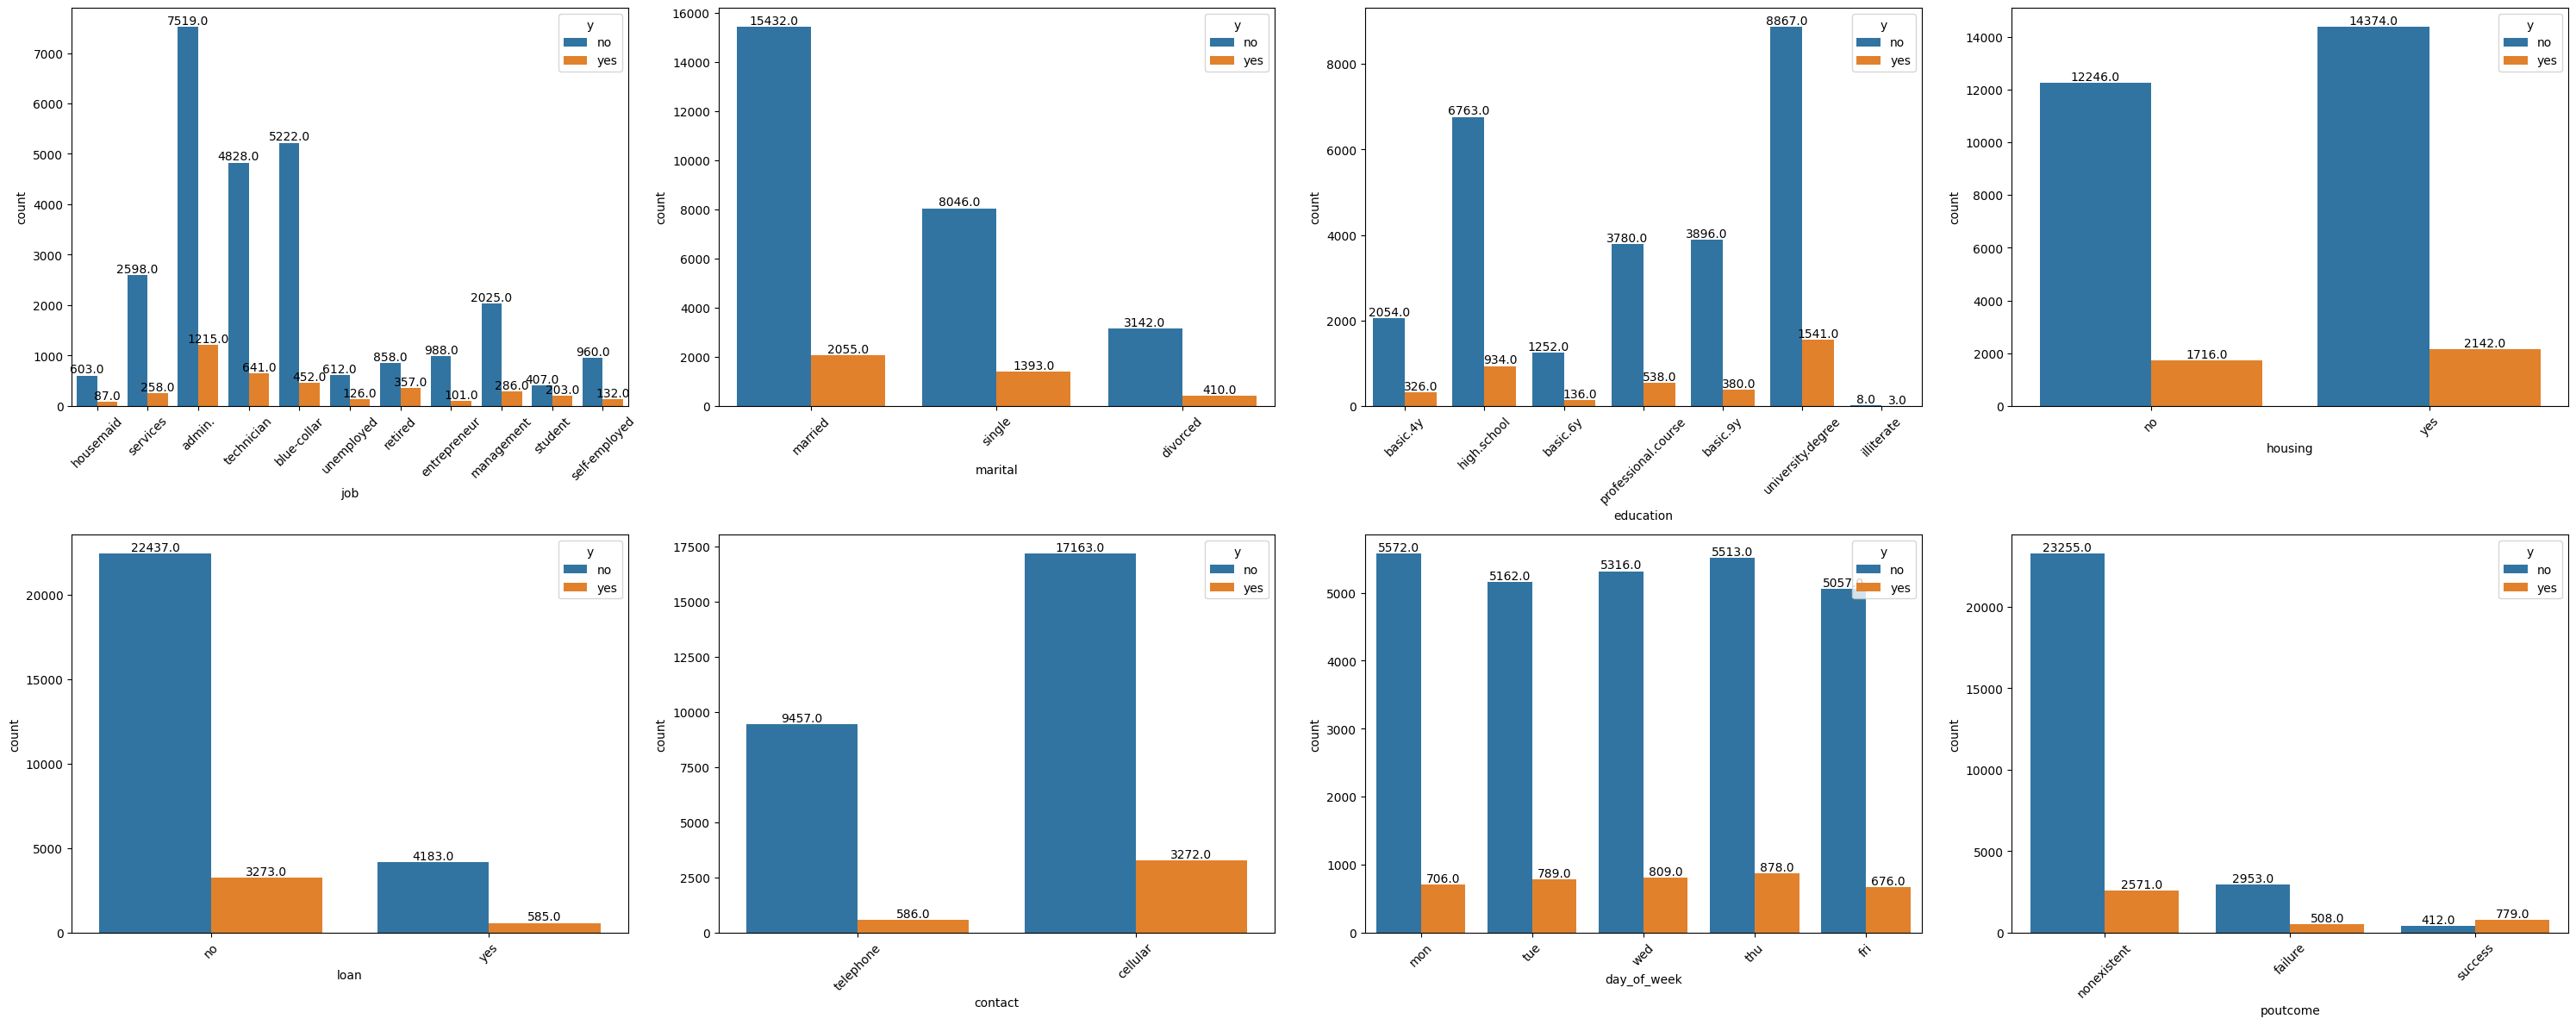

In [ ]:
plt.figure(figsize=(30,12))

for i in range(len(categoric)-1):
  plt.subplot(2, 4, i+1)
  ax = sns.countplot(data=df, x=df[categoric[i]], hue='y')
  plt.xlabel(categoric[i])
  plt.xticks(rotation=45)

  for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

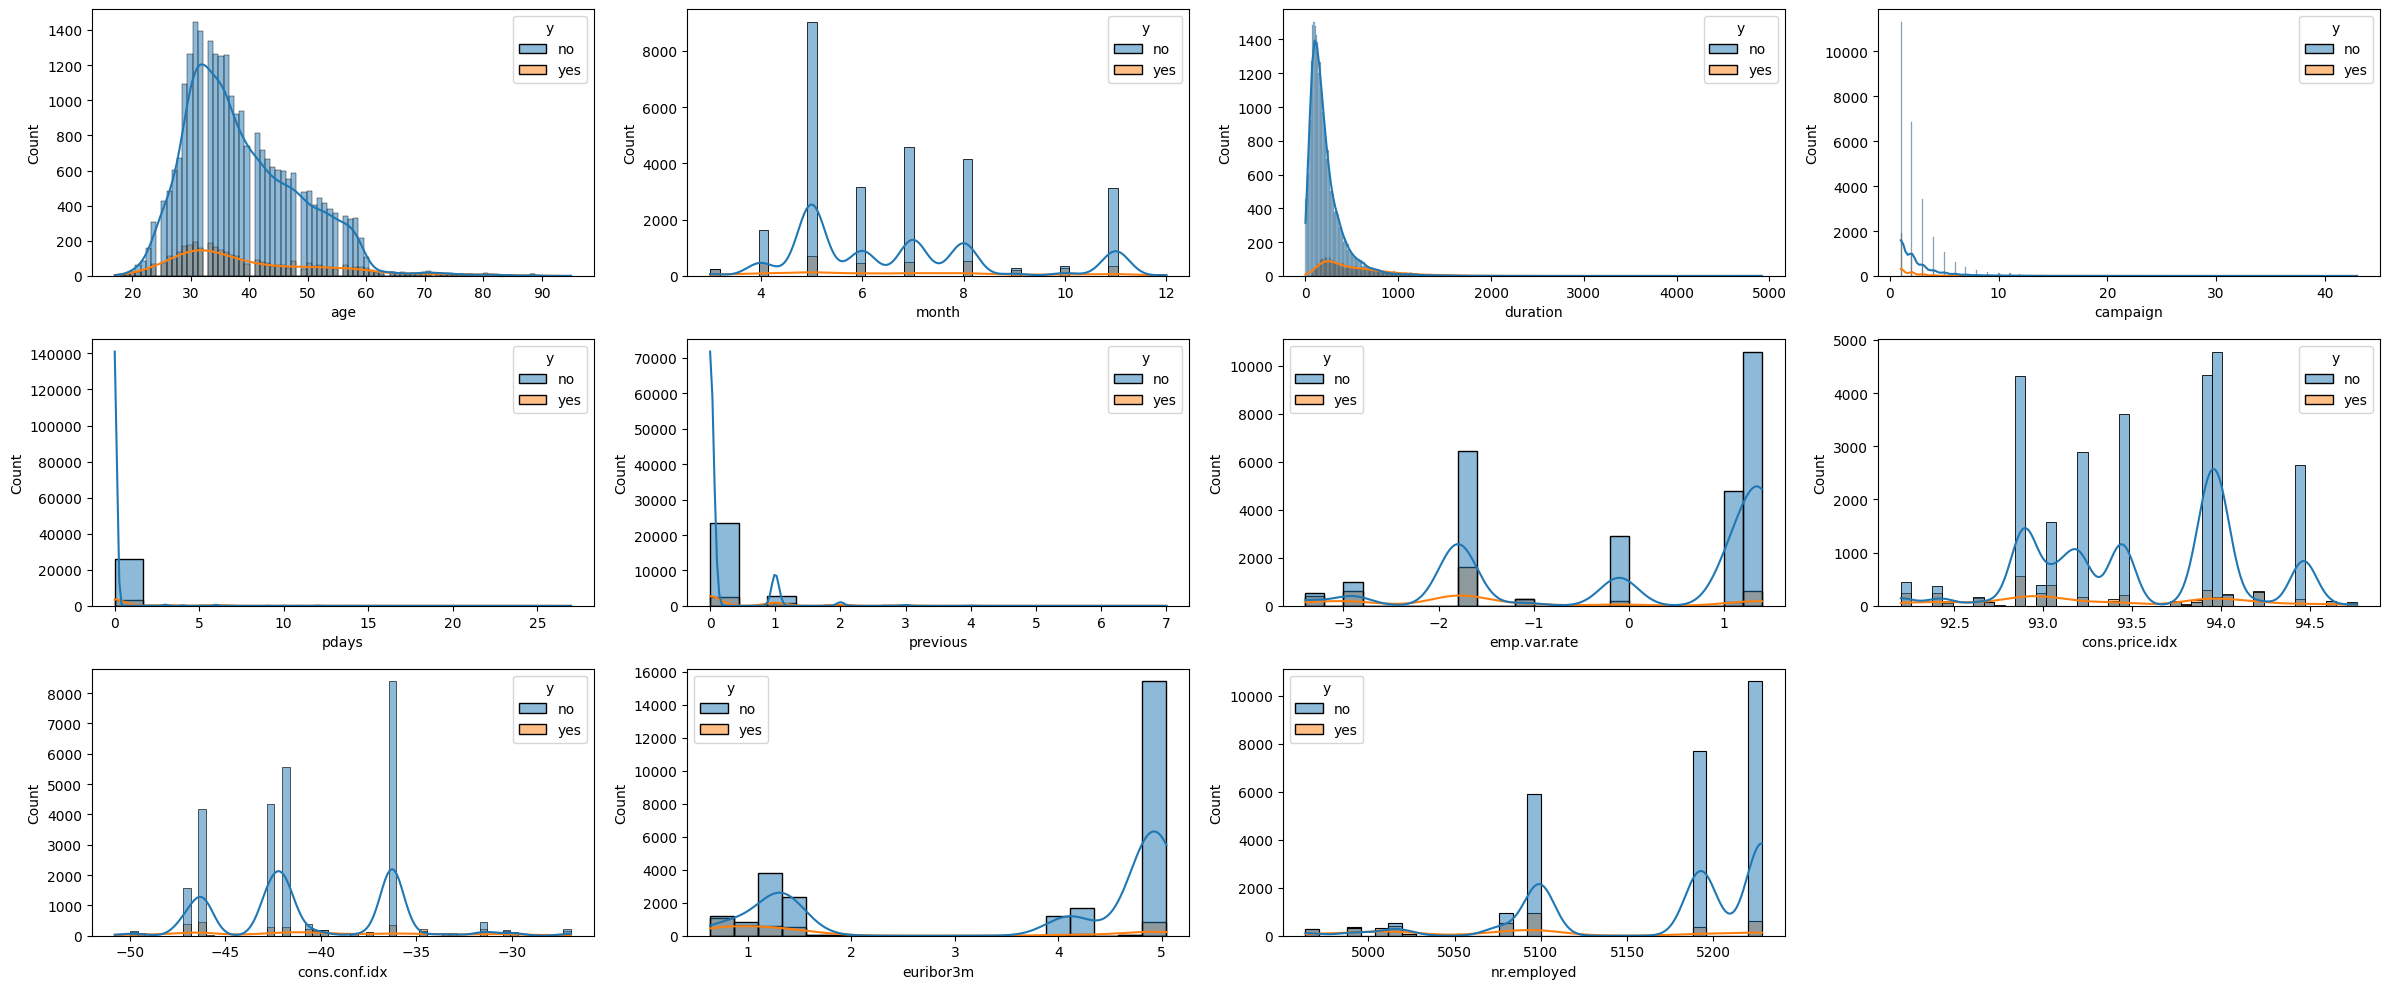

In [ ]:
plt.figure(figsize=(24,10))

for i in range(len(numeric)):
  plt.subplot(3, 4, i+1)
  sns.histplot(x=df[numeric[i]], hue=df['y'], kde=True)
  plt.xlabel(numeric[i])

plt.tight_layout()
plt.show()

## Boxplot


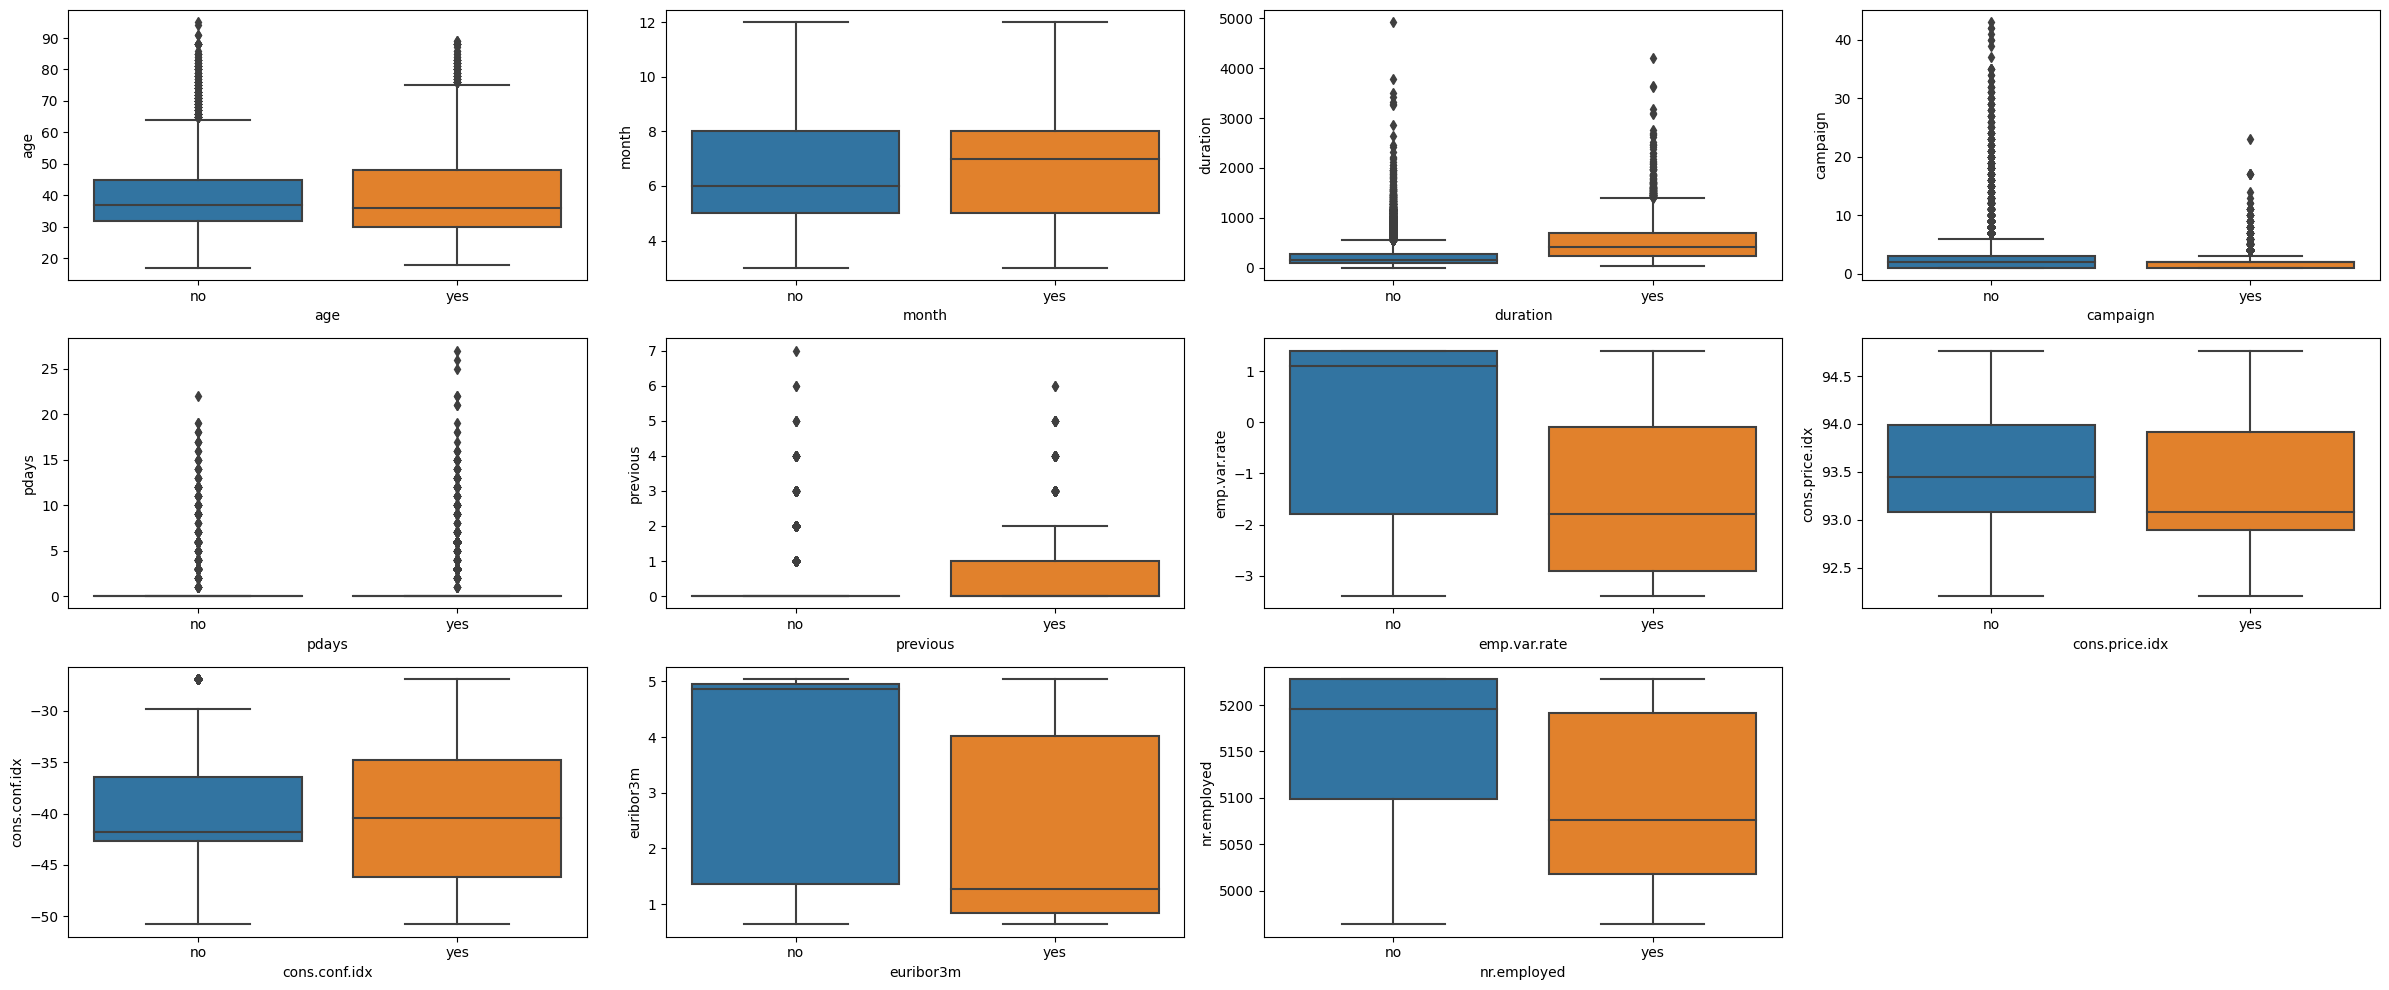

In [ ]:
plt.figure(figsize=(24,10))

for i in range(len(numeric)):
  plt.subplot(3, 4, i+1)
  sns.boxplot(data=df, x='y', y=numeric[i])
  plt.xlabel(numeric[i])

plt.tight_layout()
plt.show()

## Correlation

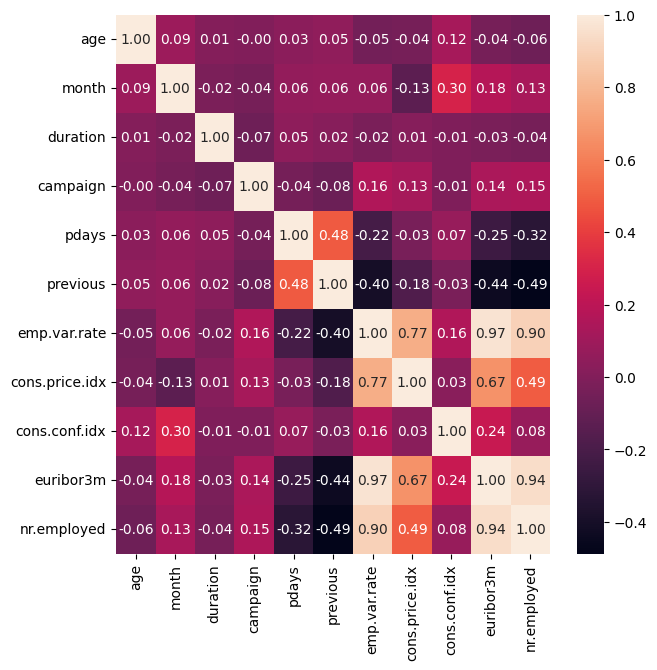

In [ ]:
correlation = df[numeric].corr()

plt.figure(figsize=(7,7))
sns.heatmap(correlation, annot=True, fmt='.2f')
plt.show()

There are multicollinearity(>.8) among columns nr.employed, emp.var.rate, and euribor3m, so 2 of these columns will be removed.

In [ ]:
df['nr.employed'].unique()

array([5191. , 5228.1, 5195.8, 5176.3, 5099.1, 5076.2, 5017.5, 5023.5,
       5008.7, 4991.6, 4963.6])

In [ ]:
df = df.drop(columns=['euribor3m', 'emp.var.rate'], axis=1)

## Deep Dive Correlation With Target

In [ ]:
# Make a copy of dataframe
df_copy = df.copy()

In [ ]:
# Mengubah nilai 'subscribe' menjadi numerik
df_copy['subscribe_numeric'] = df_copy['y'].map({'no': 0, 'yes': 1})

### Housing, Loan, & Contact on Subcription

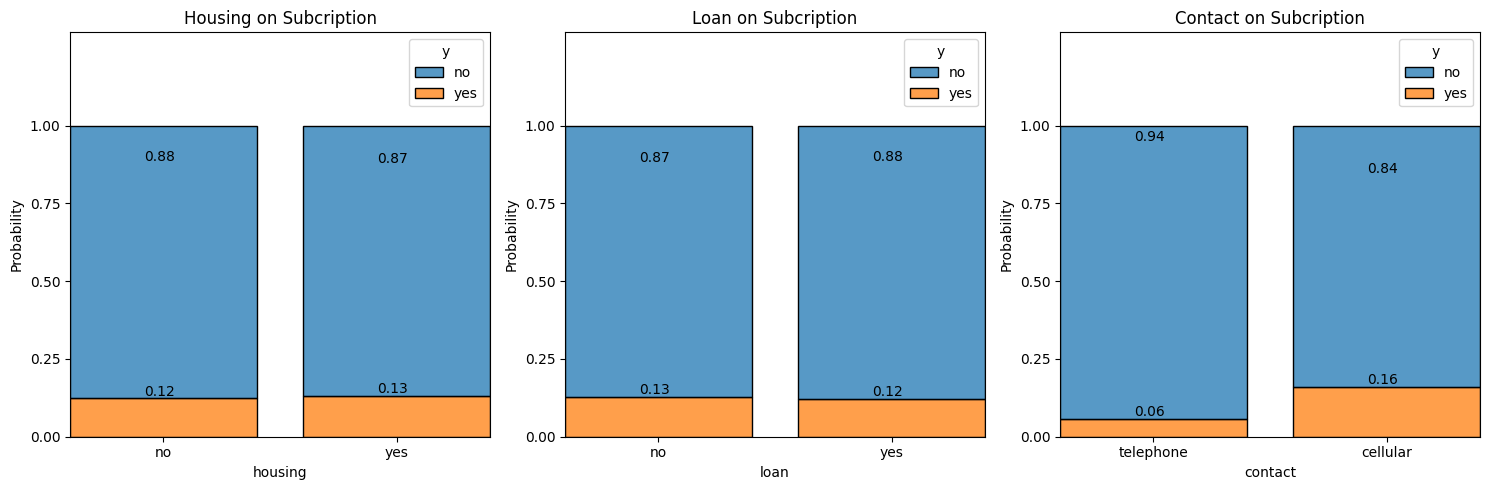

In [ ]:
categorical_vars = ['housing', 'loan', 'contact']

# Membuat histogram plot dengan looping
plt.figure(figsize=(15, 5))

for i, var in enumerate(categorical_vars, start=1):
    plt.subplot(1, len(categorical_vars), i)
    ax = sns.histplot(data=df_copy, x=var, hue='y', stat='probability', multiple='fill',
                 shrink=.8)
    plt.title(f'{var.capitalize()} on Subcription')
    ax.set_ylim(0,1.3)
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1])

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(-3, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

### Duration on Subcription

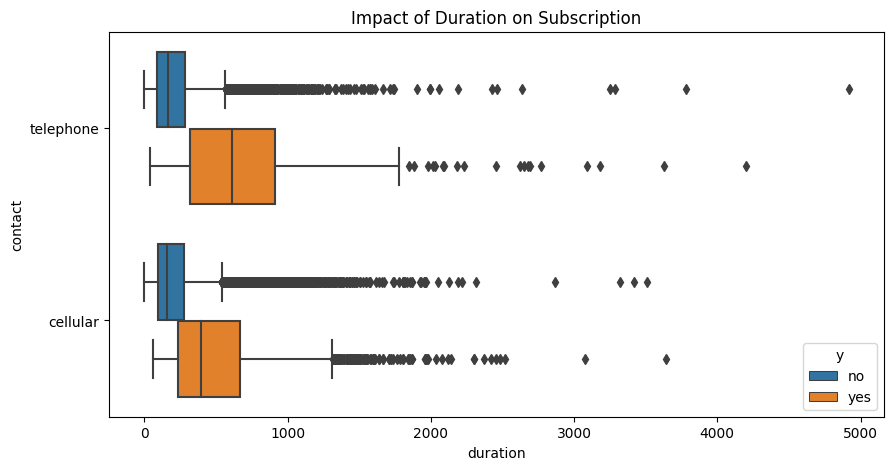

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_copy, x='duration', y='contact', hue='y')
plt.title('Impact of Duration on Subscription')

plt.show()

### Age on Subcription

<ipython-input-32-317c959ff33e>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df_copy, x='age', y='subscribe_numeric', ci=None)


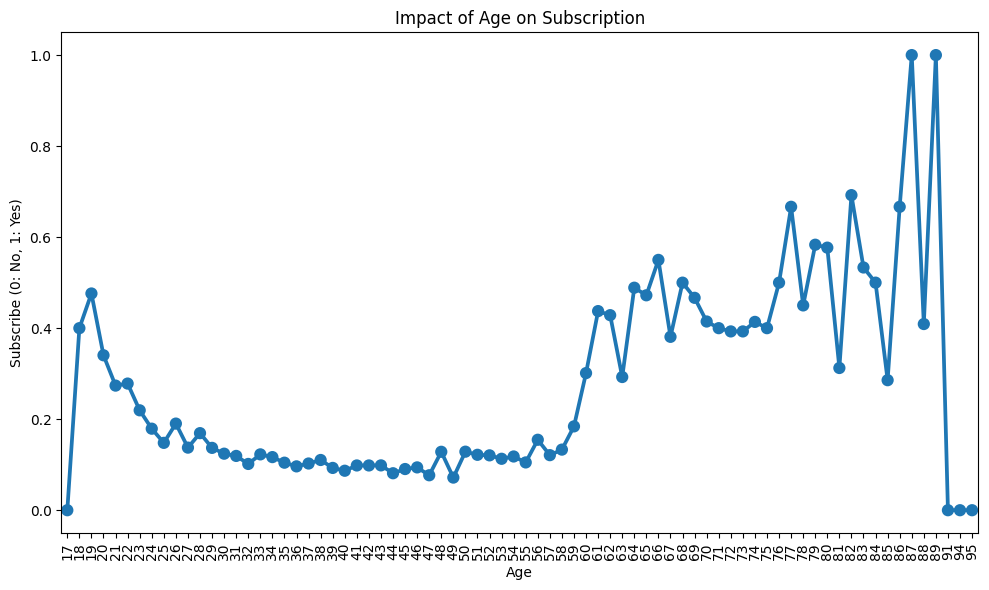

In [ ]:
plt.figure(figsize=(10, 6))

# Membuat point plot dengan trendline
sns.pointplot(data=df_copy, x='age', y='subscribe_numeric', ci=None)
plt.xlabel('Age')
plt.ylabel('Subscribe (0: No, 1: Yes)')
plt.title('Impact of Age on Subscription')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Education on Subcription

In [ ]:
education_mapping = {
    'illiterate': 1,
    'basic.4y': 2,
    'basic.6y': 3,
    'basic.9y': 4,
    'high.school': 5,
    'professional.course': 6,
    'university.degree': 7
}

# Mengubah kategori pendidikan menjadi angka
df_copy['education_mapped'] = df_copy['education'].map(education_mapping)

<ipython-input-34-e019931e5e85>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df_copy, x='education_mapped', y='subscribe_numeric', ci=None)


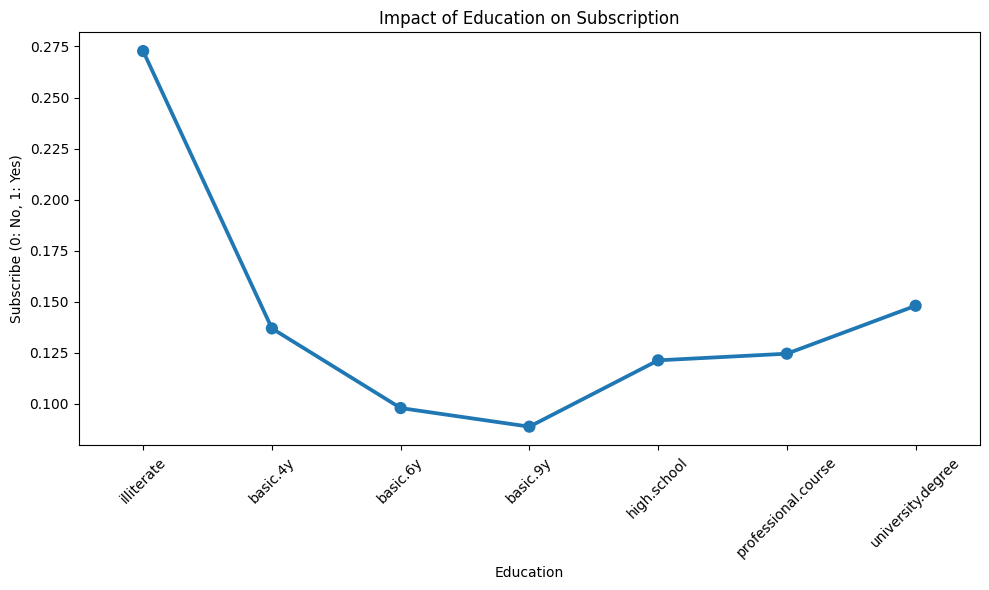

In [ ]:
plt.figure(figsize=(10, 6))

# Membuat point plot dengan trendline
sns.pointplot(data=df_copy, x='education_mapped', y='subscribe_numeric', ci=None)
plt.xlabel('Education')
plt.ylabel('Subscribe (0: No, 1: Yes)')
plt.title('Impact of Education on Subscription')
plt.xticks(ticks=range(7), labels=education_mapping.keys(), rotation=45)

plt.tight_layout()
plt.show()


### Jobs on Subcription

In [ ]:
jobs_mapping = {'unemployed' : 1,
                'student' : 2,
                'housemaid' : 3,
                'blue-collar' : 4,
                'services' : 5,
                'admin.' : 6,
                'technician' : 7,
                'management' : 8,
                'self-employed' : 9,
                'entrepreneur' : 10,
                'retired' : 11}

# Mengubah kategori pendidikan menjadi angka
df_copy['job_mapped'] = df_copy['job'].map(jobs_mapping)

<ipython-input-36-b4cfb11bf5a2>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df_copy, x='job_mapped', y='subscribe_numeric', ci=None)


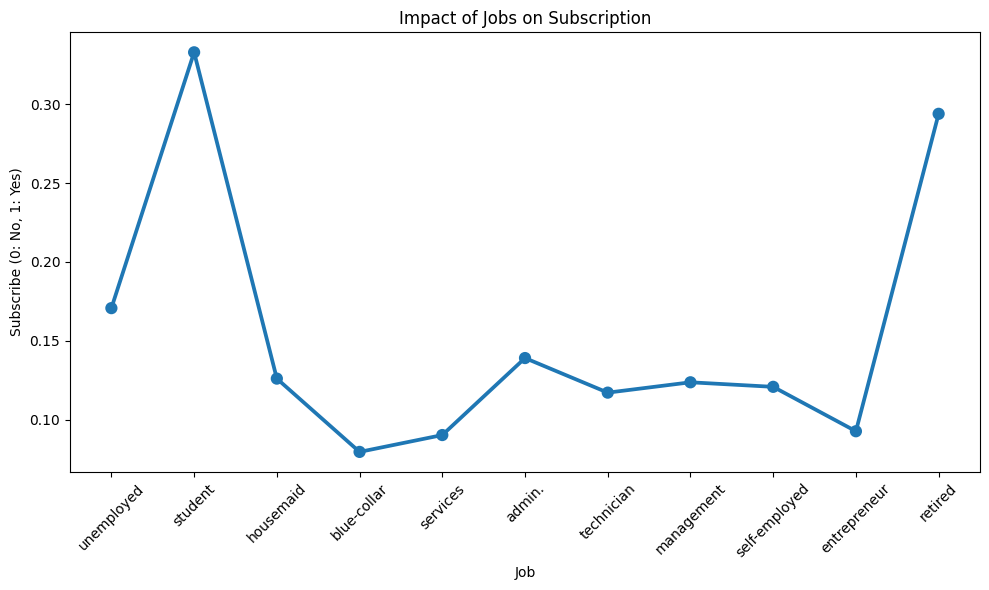

In [ ]:
plt.figure(figsize=(10, 6))

# Membuat point plot dengan trendline
sns.pointplot(data=df_copy, x='job_mapped', y='subscribe_numeric', ci=None)
plt.xlabel('Job')
plt.ylabel('Subscribe (0: No, 1: Yes)')
plt.title('Impact of Jobs on Subscription')
plt.xticks(ticks=range(11), labels=jobs_mapping.keys(), rotation=45)

plt.tight_layout()
plt.show()

### Marrital Status on Subcription

In [ ]:
marital_mapping = {'single' : 1,
                'married' : 2,
                'divorced' : 3}

# Mengubah kategori status pernikahan menjadi angka
df_copy['marital_mapped'] = df_copy['marital'].map(marital_mapping)

<ipython-input-38-a2151e774d4b>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df_copy, x='marital_mapped', y='subscribe_numeric', ci=None)


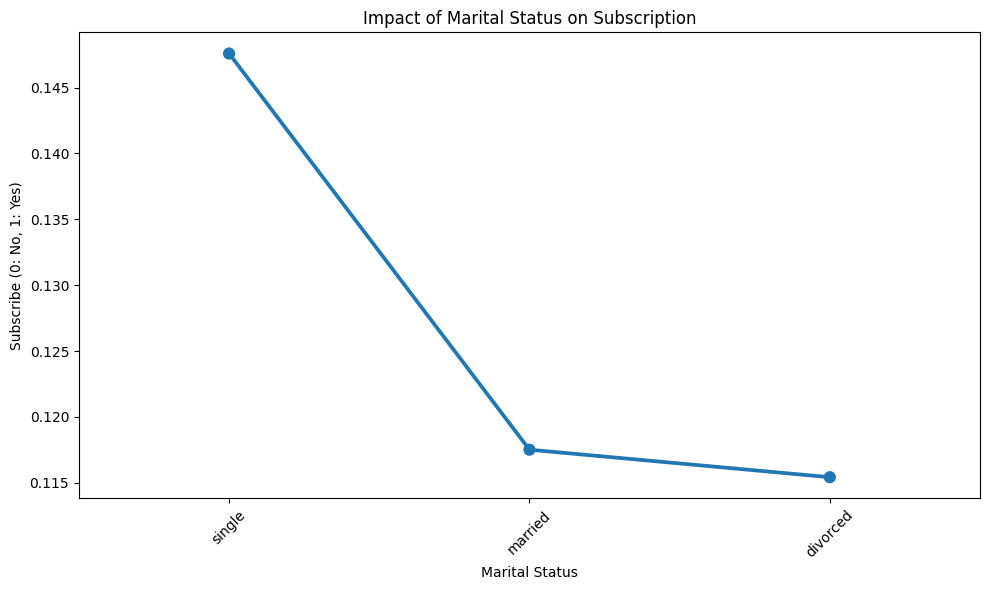

In [ ]:
plt.figure(figsize=(10, 6))

# Membuat point plot dengan trendline
sns.pointplot(data=df_copy, x='marital_mapped', y='subscribe_numeric', ci=None)
plt.xlabel('Marital Status')
plt.ylabel('Subscribe (0: No, 1: Yes)')
plt.title('Impact of Marital Status on Subscription')
plt.xticks(ticks=range(3), labels=marital_mapping.keys(), rotation=45)

plt.tight_layout()
plt.show()

### Month on Subcription

<ipython-input-39-748f0f2d80ef>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df_copy, x='month', y='subscribe_numeric', ci=None)


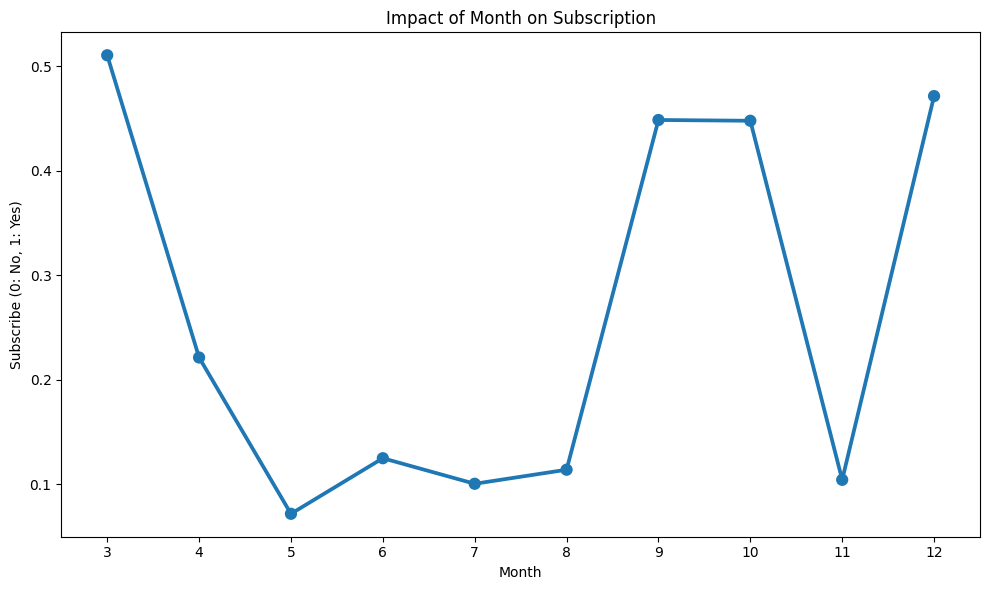

In [ ]:
plt.figure(figsize=(10, 6))

# Membuat point plot dengan trendline
sns.pointplot(data=df_copy, x='month', y='subscribe_numeric', ci=None)
plt.xlabel('Month')
plt.ylabel('Subscribe (0: No, 1: Yes)')
plt.title('Impact of Month on Subscription')

plt.tight_layout()
plt.show()

### Day of Week on Subcription

In [ ]:
day_mapping = {'mon' : 1,
                'tue' : 2,
                'wed' : 3,
                'thu' : 4,
                'fri' : 5}

# Mengubah kategori pendidikan menjadi angka
df_copy['day_mapped'] = df_copy['day_of_week'].map(day_mapping)

<ipython-input-41-787ffc1480f2>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df_copy, x='day_mapped', y='subscribe_numeric', ci=None)


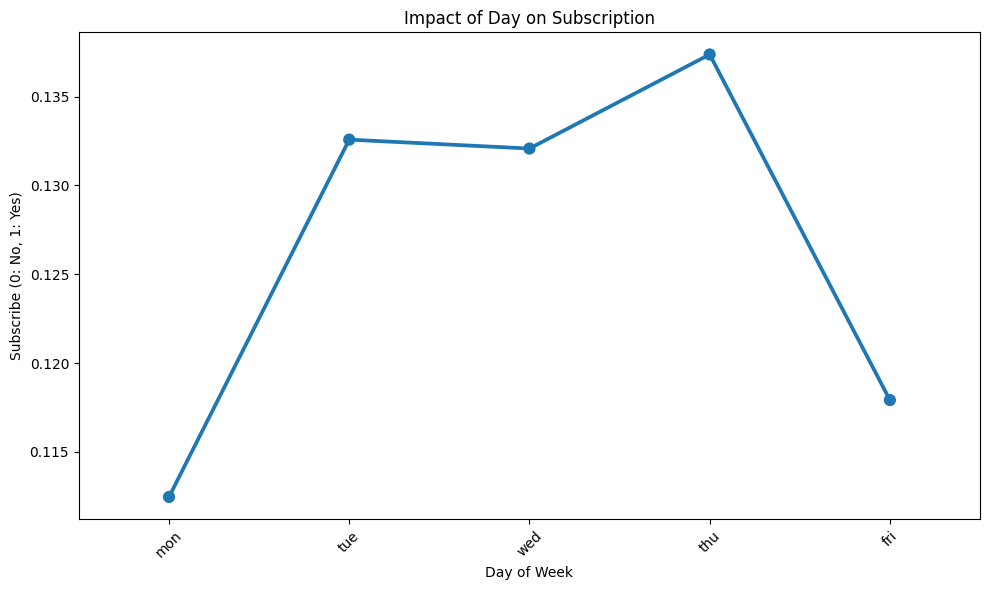

In [ ]:
plt.figure(figsize=(10, 6))

# Membuat point plot dengan trendline
sns.pointplot(data=df_copy, x='day_mapped', y='subscribe_numeric', ci=None)
plt.xlabel('Day of Week')
plt.ylabel('Subscribe (0: No, 1: Yes)')
plt.title('Impact of Day on Subscription')
plt.xticks(ticks=range(5), labels=day_mapping.keys(), rotation=45)

plt.tight_layout()
plt.show()

### Campaign on Subcription

<ipython-input-42-1b393a773f7a>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df_copy, x='campaign', y='subscribe_numeric', ci=None)


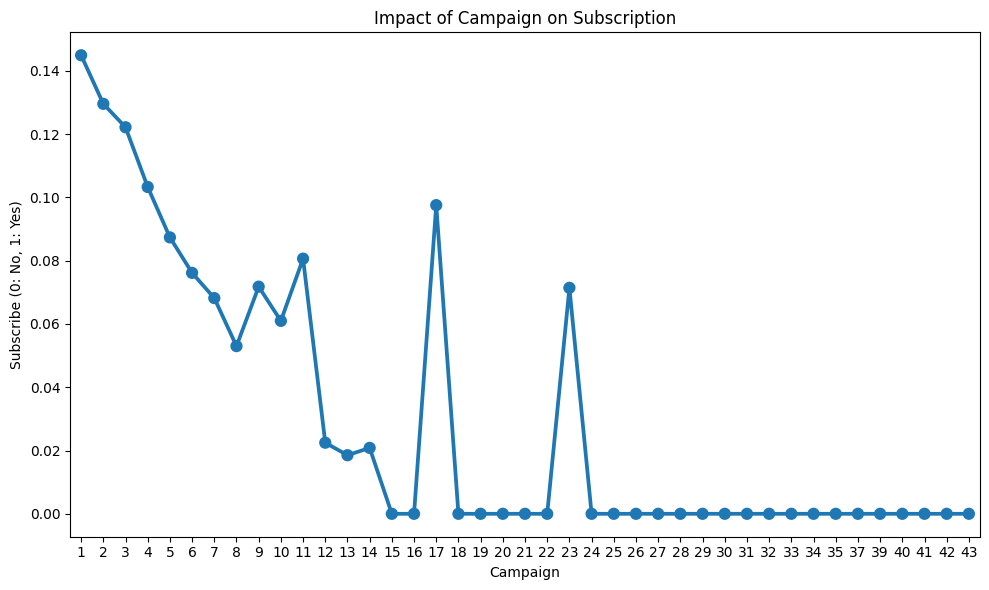

In [ ]:
plt.figure(figsize=(10, 6))

# Membuat point plot dengan trendline
sns.pointplot(data=df_copy, x='campaign', y='subscribe_numeric', ci=None)
plt.xlabel('Campaign')
plt.ylabel('Subscribe (0: No, 1: Yes)')
plt.title('Impact of Campaign on Subscription')

plt.tight_layout()
plt.show()

### Previous on Subcription

<ipython-input-43-c234af8e8797>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df_copy, x='previous', y='subscribe_numeric', ci=None)


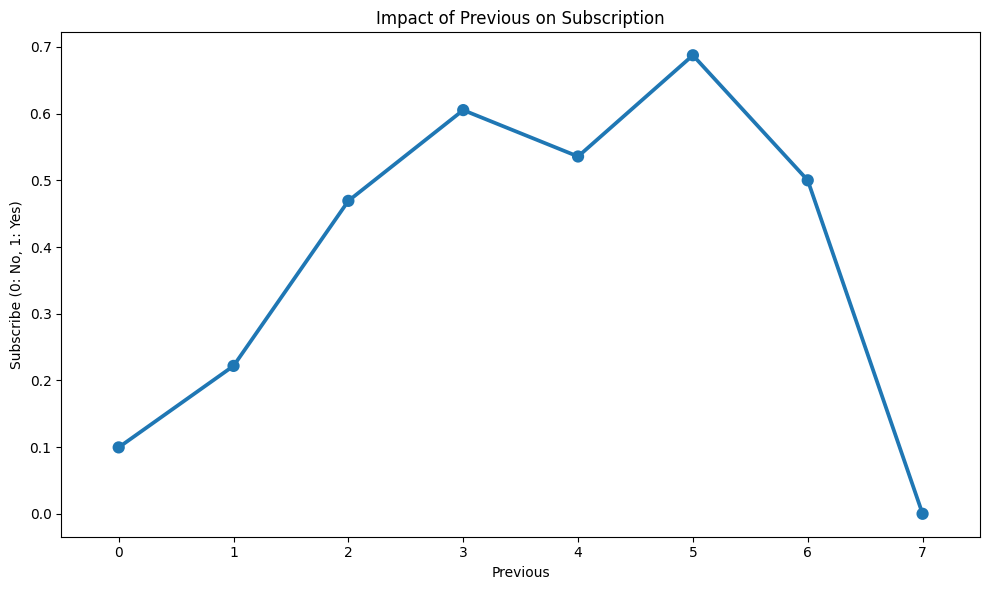

In [ ]:
plt.figure(figsize=(10, 6))

# Membuat point plot dengan trendline
sns.pointplot(data=df_copy, x='previous', y='subscribe_numeric', ci=None)
plt.xlabel('Previous')
plt.ylabel('Subscribe (0: No, 1: Yes)')
plt.title('Impact of Previous on Subscription')

plt.tight_layout()
plt.show()

### Poutcome on Subcription

In [ ]:
poutcome_mapping = {'nonexistent' : 1,
                'failure' : 2,
                'success' : 3}

# Mengubah kategori pendidikan menjadi angka
df_copy['poutcome_mapped'] = df_copy['poutcome'].map(poutcome_mapping)

<ipython-input-45-fe5cc00ba65e>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df_copy, x='poutcome_mapped', y='subscribe_numeric', ci=None)


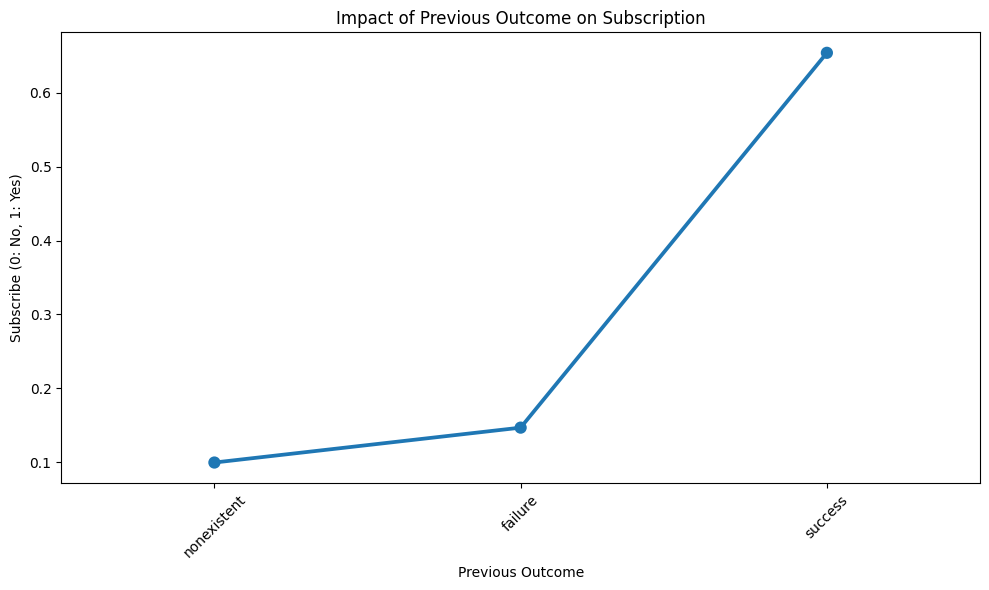

In [ ]:
plt.figure(figsize=(10, 6))

# Membuat point plot dengan trendline
sns.pointplot(data=df_copy, x='poutcome_mapped', y='subscribe_numeric', ci=None)
plt.xlabel('Previous Outcome')
plt.ylabel('Subscribe (0: No, 1: Yes)')
plt.title('Impact of Previous Outcome on Subscription')
plt.xticks(ticks=range(3), labels=poutcome_mapping.keys(), rotation=45)

plt.tight_layout()
plt.show()

### Number Employed on Subcription

<ipython-input-46-490b5f008215>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df_copy, x='nr.employed', y='subscribe_numeric', ci=None)


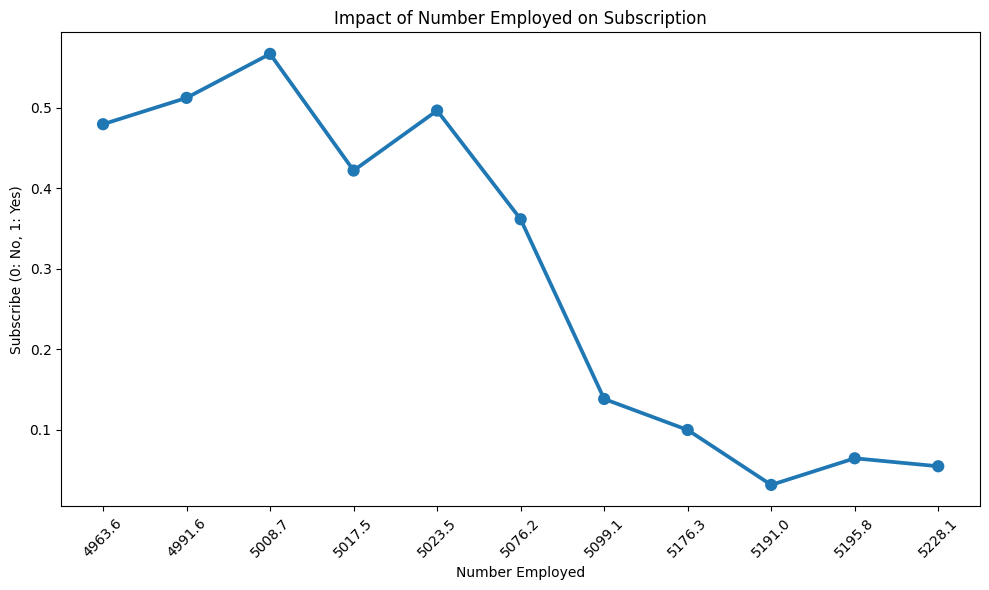

In [ ]:
plt.figure(figsize=(10, 6))

# Membuat point plot dengan trendline
sns.pointplot(data=df_copy, x='nr.employed', y='subscribe_numeric', ci=None)
plt.xlabel('Number Employed')
plt.ylabel('Subscribe (0: No, 1: Yes)')
plt.title('Impact of Number Employed on Subscription')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Data Preprocessing

## Feature Encoding

In [ ]:
def encode_binary(value):
  if value == 'no':
    return 0
  else:
    return 1

df['housing'] = df['housing'].apply(encode_binary)
df['loan'] = df['loan'].apply(encode_binary)
df['y'] = df['y'].apply(encode_binary)

In [ ]:
cat = ['job', 'marital', 'education', 'contact', 'month',
       'day_of_week', 'poutcome']

le = preprocessing.LabelEncoder()
df[cat] = df[cat].apply(le.fit_transform)

df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed,y
0,56,3,1,0,0,0,1,2,1,261,1,0,0,1,93.994,-36.4,5191.0,0
1,37,7,1,3,1,0,1,2,1,226,1,0,0,1,93.994,-36.4,5191.0,0
2,40,0,1,1,0,0,1,2,1,151,1,0,0,1,93.994,-36.4,5191.0,0
3,56,7,1,3,0,1,1,2,1,307,1,0,0,1,93.994,-36.4,5191.0,0
4,59,0,1,5,0,0,1,2,1,139,1,0,0,1,93.994,-36.4,5191.0,0


## Scaling

In [ ]:
for col in df:
  scaler = MinMaxScaler()
  df[col] = scaler.fit_transform(df[col].values.reshape(len(df), 1))

df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed,y
0,0.500000,0.3,0.5,0.000000,0.0,0.0,1.0,0.222222,0.25,0.053070,0.0,0.0,0.0,0.5,0.698753,0.60251,0.859735,0.0
1,0.256410,0.7,0.5,0.500000,1.0,0.0,1.0,0.222222,0.25,0.045954,0.0,0.0,0.0,0.5,0.698753,0.60251,0.859735,0.0
2,0.294872,0.0,0.5,0.166667,0.0,0.0,1.0,0.222222,0.25,0.030704,0.0,0.0,0.0,0.5,0.698753,0.60251,0.859735,0.0
3,0.500000,0.7,0.5,0.500000,0.0,1.0,1.0,0.222222,0.25,0.062424,0.0,0.0,0.0,0.5,0.698753,0.60251,0.859735,0.0
4,0.538462,0.0,0.5,0.833333,0.0,0.0,1.0,0.222222,0.25,0.028264,0.0,0.0,0.0,0.5,0.698753,0.60251,0.859735,0.0


## Train Test Split

In [ ]:
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Modelling

In [ ]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

svm = SVC(random_state=42)
svm.fit(X_train, y_train)

SVC(random_state=42)

## Models Evaluation

performa logreg:
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      5324
         1.0       0.72      0.37      0.49       772

    accuracy                           0.90      6096
   macro avg       0.82      0.68      0.72      6096
weighted avg       0.89      0.90      0.89      6096



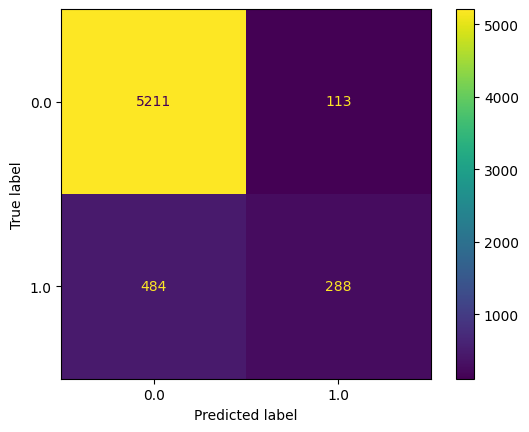


performa dtc:
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      5324
         1.0       0.52      0.53      0.52       772

    accuracy                           0.88      6096
   macro avg       0.72      0.73      0.73      6096
weighted avg       0.88      0.88      0.88      6096



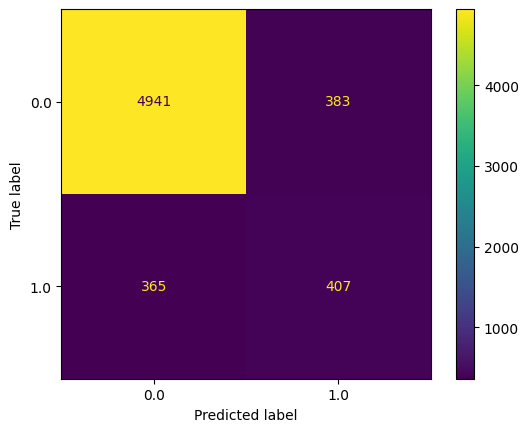


performa rfc:
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95      5324
         1.0       0.66      0.54      0.59       772

    accuracy                           0.91      6096
   macro avg       0.80      0.75      0.77      6096
weighted avg       0.90      0.91      0.90      6096



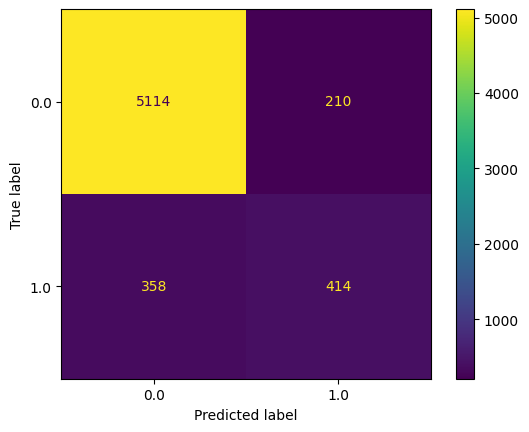


performa xgb:
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      5324
         1.0       0.66      0.54      0.60       772

    accuracy                           0.91      6096
   macro avg       0.80      0.75      0.77      6096
weighted avg       0.90      0.91      0.90      6096



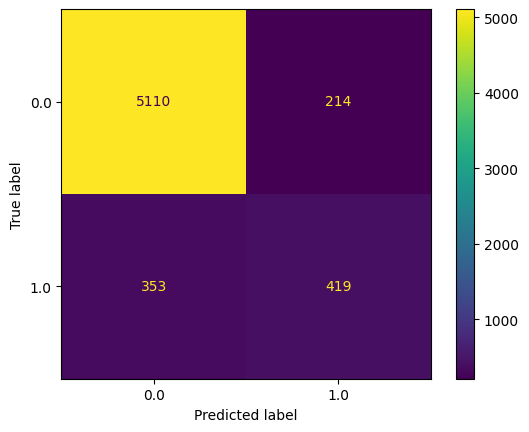


performa svm:
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94      5324
         1.0       0.71      0.29      0.41       772

    accuracy                           0.90      6096
   macro avg       0.81      0.64      0.68      6096
weighted avg       0.88      0.90      0.88      6096



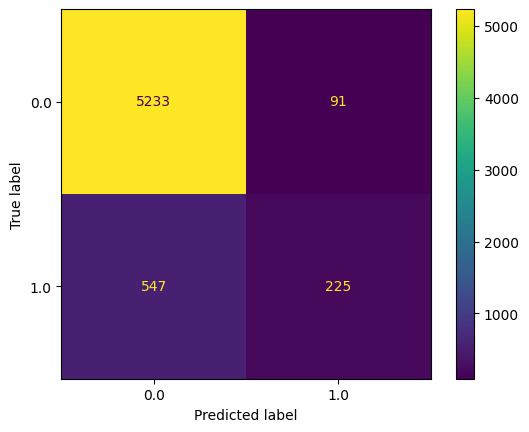

In [ ]:
models = [logreg, dtc, rfc, xgb, svm]
str_model = ['logreg', 'dtc', 'rfc', 'xgb', 'svm']

for model, str_mod in zip(models, str_model):
  prediction = model.predict(X_test)
  cm = confusion_matrix(y_test, prediction,labels=model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
  print(f'performa {str_mod}:')
  #print(confusion_matrix(y_test, prediction))
  print(classification_report(y_test, prediction))
  disp.plot()
  plt.show()
  print()

# Modelling With Imbalance Data Handling

## Imbalance Data Handling

In [ ]:
# imbalance data handling menggunakan SMOTE
smote = over_sampling.SMOTE(random_state=42)

X_smote, y_smote = smote.fit_resample(X,y)

In [ ]:
X_train_smote, X_test_smote,y_train_smote,y_test_smote = train_test_split(X_smote, y_smote,
                                                  test_size = 0.2,
                                                  random_state = 42)

## Modelling

In [ ]:
logreg_smote = LogisticRegression(random_state=42)
logreg_smote.fit(X_train_smote, y_train_smote)

dtc_smote = DecisionTreeClassifier(random_state=42)
dtc_smote.fit(X_train_smote, y_train_smote)

rfc_smote = RandomForestClassifier(random_state=42)
rfc_smote.fit(X_train_smote, y_train_smote)

xgb_smote = XGBClassifier(random_state=42)
xgb_smote.fit(X_train_smote, y_train_smote)

svm_smote = SVC(random_state=42)
svm_smote.fit(X_train_smote, y_train_smote)

SVC(random_state=42)

## Models Evaluation

performa logreg_smote:
              precision    recall  f1-score   support

         0.0       0.97      0.85      0.91      5324
         1.0       0.45      0.84      0.59       772

    accuracy                           0.85      6096
   macro avg       0.71      0.85      0.75      6096
weighted avg       0.91      0.85      0.87      6096



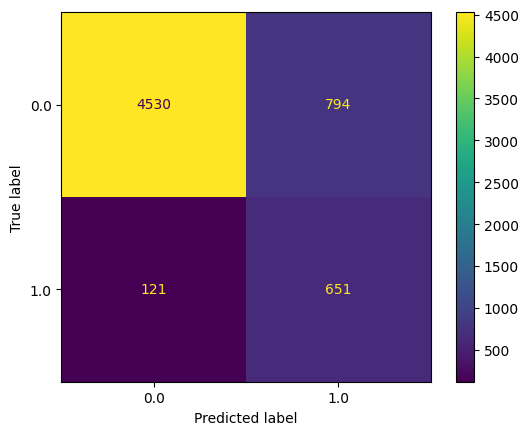


performa dtc_smote:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      5324
         1.0       0.90      0.95      0.92       772

    accuracy                           0.98      6096
   macro avg       0.95      0.97      0.96      6096
weighted avg       0.98      0.98      0.98      6096



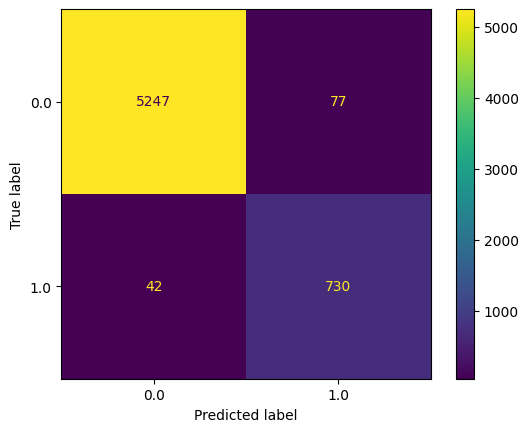


performa rfc_smote:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      5324
         1.0       0.90      0.96      0.93       772

    accuracy                           0.98      6096
   macro avg       0.95      0.97      0.96      6096
weighted avg       0.98      0.98      0.98      6096



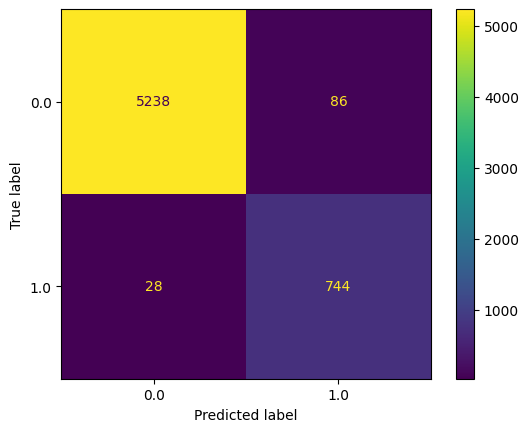


performa xgb_smote:
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      5324
         1.0       0.81      0.78      0.80       772

    accuracy                           0.95      6096
   macro avg       0.89      0.88      0.88      6096
weighted avg       0.95      0.95      0.95      6096



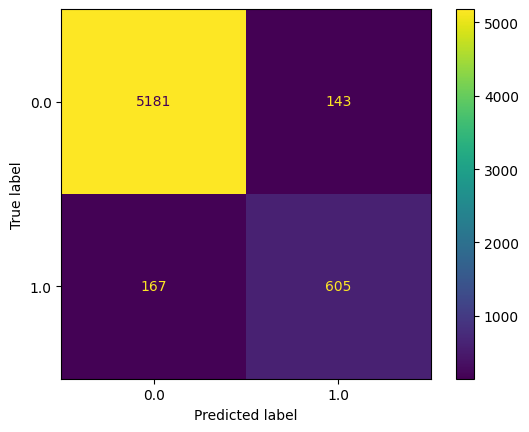


performa svm_smote:
              precision    recall  f1-score   support

         0.0       0.99      0.84      0.91      5324
         1.0       0.46      0.92      0.61       772

    accuracy                           0.85      6096
   macro avg       0.72      0.88      0.76      6096
weighted avg       0.92      0.85      0.87      6096



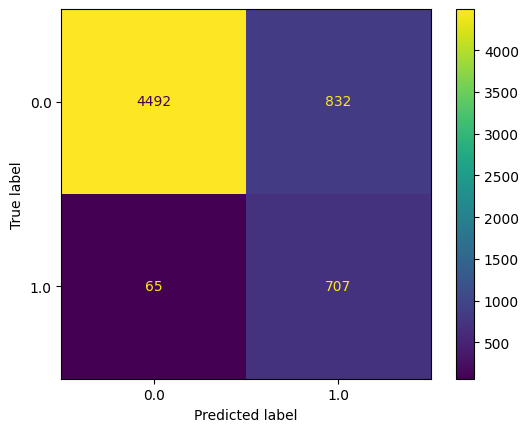

In [ ]:
models = [logreg_smote, dtc_smote, rfc_smote, xgb_smote, svm_smote]
str_model = ['logreg_smote', 'dtc_smote', 'rfc_smote', 'xgb_smote', 'svm_smote']

for model, str_mod in zip(models, str_model):
  prediction = model.predict(X_test)
  cm = confusion_matrix(y_test, prediction,labels=model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
  print(f'performa {str_mod}:')
  #print(confusion_matrix(y_test, prediction))
  print(classification_report(y_test, prediction))
  disp.plot()
  plt.show()
  print()

# Models Validation Using K-Fold

In [ ]:
kfold = model_selection.KFold(n_splits=10,shuffle=True,
                              random_state=42)

In [ ]:
for model,str_mod in zip(models, str_model):
  result = model_selection.cross_val_score(model, X_smote, y_smote, cv=kfold,
                                           scoring='f1')
  print(f'Model {str_mod}:')
  print('f1-score :%.2f%% (%.2f%%)' % (result.mean()*100, result.std()*100))

Model logreg_smote:
f1-score :85.88% (0.47%)
Model dtc_smote:
f1-score :91.45% (0.48%)
Model rfc_smote:
f1-score :94.67% (0.38%)
Model xgb_smote:
f1-score :94.40% (0.36%)
Model svm_smote:
f1-score :89.29% (0.36%)


# Hyperparameter Tuning

In [ ]:
rfc_smote.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# specify the hyperparameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 150],     # Jumlah pohon dalam Random Forest
    'max_depth': [None, 10, 20, 30],     # Kedalaman maksimum setiap pohon
    'min_samples_split': [2, 5, 10],     # Jumlah minimum sampel untuk split node
    'min_samples_leaf': [1, 2, 4]        # Jumlah minimum sampel di leaf node
}

# create the grid search object
grid_search = GridSearchCV(rfc_smote, param_grid, scoring='f1', cv=5)

# fit the grid search to the data
grid_search.fit(X_train_smote, y_train_smote)

# get the best hyperparameters and the best cross-validation score
best_params = grid_search.best_params_
best_score = grid_search.best_score_


In [ ]:
best_params

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

In [ ]:
best_score

0.9434808789750561

performa base_rfc:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      5324
         1.0       0.90      0.96      0.93       772

    accuracy                           0.98      6096
   macro avg       0.95      0.97      0.96      6096
weighted avg       0.98      0.98      0.98      6096



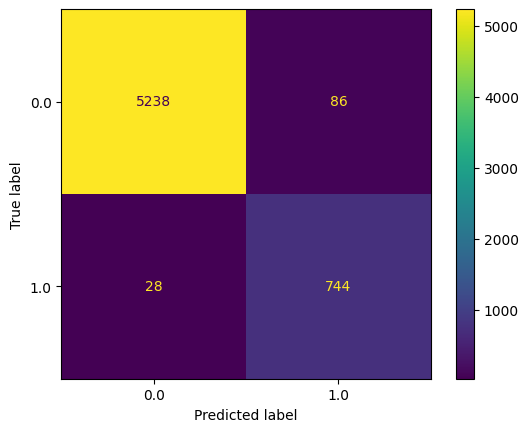


performa tuned_rfc:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      5324
         1.0       0.90      0.97      0.93       772

    accuracy                           0.98      6096
   macro avg       0.95      0.97      0.96      6096
weighted avg       0.98      0.98      0.98      6096



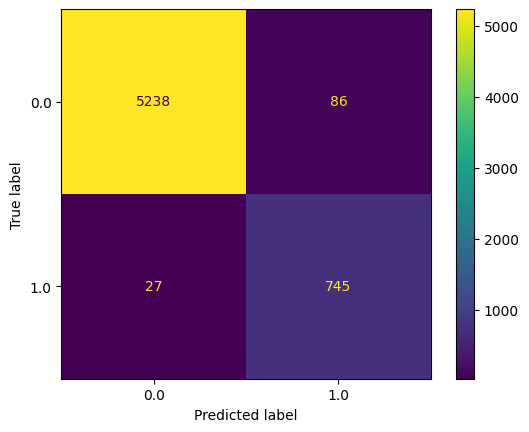

In [ ]:
models = [base_rfc, best_grid]
str_model = ['base_rfc', 'tuned_rfc']

for model, str_mod in zip(models, str_model):
  prediction = model.predict(X_test)
  cm = confusion_matrix(y_test, prediction,labels=model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
  print(f'performa {str_mod}:')
  #print(confusion_matrix(y_test, prediction))
  print(classification_report(y_test, prediction))
  disp.plot()
  plt.show()
  print()

# Features Importance

In [ ]:
importances = rfc_smote.feature_importances_

In [ ]:
features = pd.DataFrame({'feature' : X_train_smote.columns, 'importance' : importances})

In [ ]:
features = features.sort_values(by = 'importance', ascending=True)
features

,feature,importance
5,loan,0.006305
4,housing,0.009266
6,contact,0.011586
2,marital,0.013917
12,previous,0.019235
13,poutcome,0.022425
11,pdays,0.026575
3,education,0.029661
1,job,0.030938
8,day_of_week,0.036846


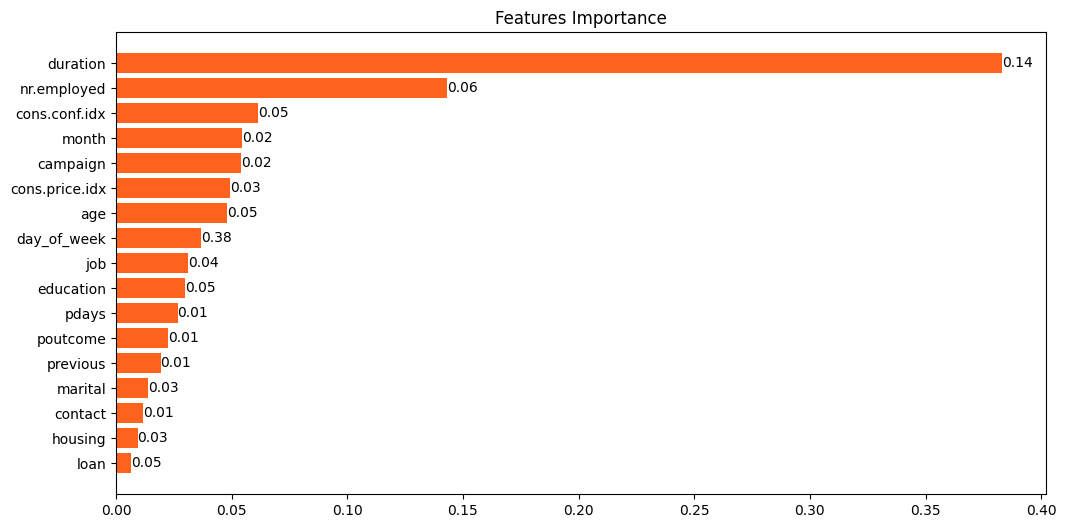

In [ ]:
plt.figure(figsize=(12,6))

bars = plt.barh(features['feature'], features['importance'], color = '#fe621d')
plt.title('Features Importance')

for index, bar in enumerate(bars):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{importances[index]:.2f}',
             va='center', ha='left', fontsize=10, color='black')

plt.show()